# Working with Time Series in Pandas

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

**First time series**

In [2]:
time_stamp = pd.Timestamp(datetime(2017, 1, 1))

In [3]:
datetime(2017, 1, 1)

datetime.datetime(2017, 1, 1, 0, 0)

In [4]:
time_stamp

Timestamp('2017-01-01 00:00:00')

In [5]:
time_stamp.year

2017

In [6]:
time_stamp.day

1

In [7]:
period = pd.Period('2017-01')

In [8]:
period

Period('2017-01', 'M')

In [9]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [10]:
period.to_timestamp()

Timestamp('2017-01-01 00:00:00')

In [11]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [12]:
period+2

Period('2017-03', 'M')

In [13]:
u=pd.Timestamp('2017-01-31','M')

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_9384/3007353215.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  u=pd.Timestamp('2017-01-31','M')


In [14]:
index = pd.date_range(start='2017-1-1', periods=12, freq='M')


In [15]:
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [17]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [18]:
pd.DataFrame({'data': index})

,data
0,2017-01-31
1,2017-02-28
2,2017-03-31
3,2017-04-30
4,2017-05-31
5,2017-06-30
6,2017-07-31
7,2017-08-31
8,2017-09-30
9,2017-10-31


In [19]:
data = np.random.rand(12,2)
x=pd.DataFrame(data=data, index=index)
x


,0,1
2017-01-31,0.333290,0.462044
2017-02-28,0.775593,0.141131
2017-03-31,0.647217,0.279284
2017-04-30,0.716618,0.598098
2017-05-31,0.456290,0.511610
2017-06-30,0.477557,0.720062
2017-07-31,0.120409,0.623900
2017-08-31,0.582845,0.226765
2017-09-30,0.671078,0.093531
2017-10-31,0.232293,0.717084


<AxesSubplot:>

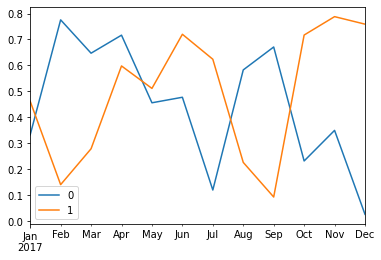

In [20]:
x.plot()

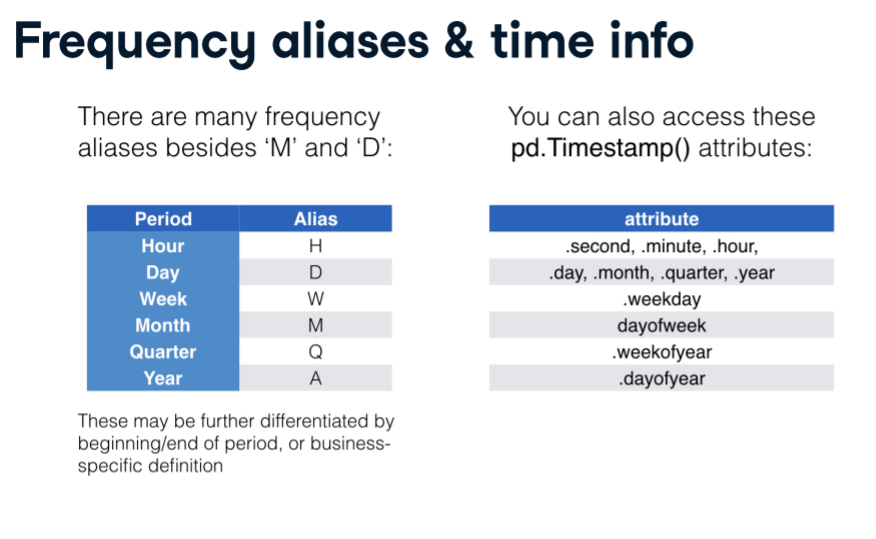

In [21]:
pd.date_range(start='2017-1-1', periods=7, freq='D')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

**Indexing & resampling time series**

In [22]:
# Using plotly.express
import plotly.express as px

df = px.data.stocks()

In [23]:
df.date=pd.to_datetime(df.date)

In [24]:
# Permite tratar al dataframe como serie de tiempo
df.set_index("date",inplace=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

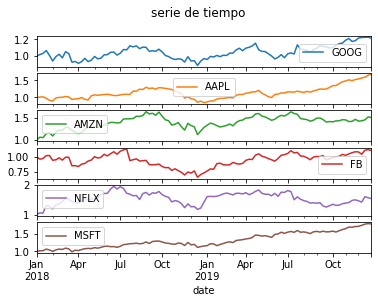

In [25]:
df.plot(title="serie de tiempo",subplots=True)

In [26]:
df.loc['2018']

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
2018-02-05,0.941528,0.893771,1.089868,0.942521,1.188009,0.999887
2018-02-12,0.993259,0.985314,1.178621,0.949211,1.326349,1.043202
2018-02-19,1.022282,1.002857,1.220365,0.980947,1.361636,1.066561
2018-02-26,0.978852,1.006914,1.220569,0.945250,1.433640,1.055108


In [27]:
df.loc['2018-3':'2019-1']

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-03-05,1.052448,1.028457,1.284549,0.991330,1.578361,1.094682
2018-03-12,1.030393,1.017257,1.278683,0.990581,1.516501,1.072684
2018-03-19,0.926821,0.942514,1.216753,0.853037,1.433116,0.988547
2018-03-26,0.936093,0.958743,1.177522,0.855178,1.406496,1.034925
2018-04-02,0.913639,0.962171,1.143263,0.841317,1.375542,1.023132
2018-04-09,0.933807,0.998457,1.164058,0.880492,1.484118,1.055448
2018-04-16,0.973445,0.946971,1.242731,0.889912,1.560884,1.077220
2018-04-23,0.934515,0.927543,1.279447,0.929034,1.484642,1.086518
2018-04-30,0.950990,1.050457,1.286224,0.945197,1.524311,1.079034


In [28]:
df.loc['2018-3':'2019-1',"GOOG"]

date
2018-03-05    1.052448
2018-03-12    1.030393
2018-03-19    0.926821
2018-03-26    0.936093
2018-04-02    0.913639
2018-04-09    0.933807
2018-04-16    0.973445
2018-04-23    0.934515
2018-04-30    0.950990
2018-05-07    0.996398
2018-05-14    0.967457
2018-05-21    0.975894
2018-05-28    1.015668
2018-06-04    1.016911
2018-06-11    1.045390
2018-06-18    1.048311
2018-06-25    1.012175
2018-07-02    1.034421
2018-07-09    1.078559
2018-07-16    1.075012
2018-07-23    1.123631
2018-07-30    1.110213
2018-08-06    1.122824
2018-08-13    1.089573
2018-08-20    1.107437
2018-08-27    1.105205
2018-09-03    1.056794
2018-09-10    1.063780
2018-09-17    1.057937
2018-09-24    1.082778
2018-10-01    1.050008
2018-10-08    1.007122
2018-10-15    0.994765
2018-10-22    0.972093
2018-10-29    0.959682
2018-11-05    0.967266
2018-11-12    0.963039
2018-11-19    0.928917
2018-11-26    0.992924
2018-12-03    0.940439
2018-12-10    0.945447
2018-12-17    0.888689
2018-12-24    0.940893
2018-1

In [29]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18',
               '2019-11-25', '2019-12-02', '2019-12-09', '2019-12-16',
               '2019-12-23', '2019-12-30'],
              dtype='datetime64[ns]', name='date', length=105, freq=None)

In [30]:
df.asfreq('M')

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,0.950990,1.050457,1.286224,0.945197,1.524311,1.079034
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.asfreq('d')

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000,1.00000,1.000000,1.000000,1.000000
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN


**Lags, changes, and returns for stock price series**

In [32]:
#google = pd.read_csv('google.csv',parse_dates=['Date'],index_col='Date')


In [33]:
# Create 'lagged' and 'shifted'
#google['lagged'] = google.Close.shift(periods=-1)
#google['shifted'] = google.Close.shift()

In [34]:
df.GOOG.shift(periods=-1)

date
2018-01-01    1.018172
2018-01-08    1.032008
2018-01-15    1.066783
2018-01-22    1.008773
2018-01-29    0.941528
                ...   
2019-12-02    1.222821
2019-12-09    1.224418
2019-12-16    1.226504
2019-12-23    1.213014
2019-12-30         NaN
Name: GOOG, Length: 105, dtype: float64

In [35]:
df.GOOG.shift(periods=1)

date
2018-01-01         NaN
2018-01-08    1.000000
2018-01-15    1.018172
2018-01-22    1.032008
2018-01-29    1.066783
                ...   
2019-12-02    1.183927
2019-12-09    1.216280
2019-12-16    1.222821
2019-12-23    1.224418
2019-12-30    1.226504
Name: GOOG, Length: 105, dtype: float64